**Simule el primer sistema cuántico descrito en la sección 4.1.**

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [12]:
import numpy as np

# Definir el array de ejemplo
array = np.array([4, 7, 22, 56, 69,71])

# Definir el índice de la posición a evaluar
x = 5

# Calcular el numerador (valor absoluto al cuadrado en la posición j)
numerador = np.abs(array[j])**2

# Calcular el denominador (norma al cuadrado de todo el array)
denominador = np.linalg.norm(array)**2

# Verificar si el denominador es cero
if denominador == 0:
    raise ValueError("Error: División por cero debido a una norma cero.")

# Calcular la probabilidad en la posición x
prob = (numerador / denominador) * 100  # Multiplicamos por 100 para porcentaje


print(f"Punto 1:\nLa probabilidad en la posición {x} es de: {prob:.2f}%")


Punto 1:
La probabilidad en la posición 5 es de: 37.38%


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [14]:
import numpy as np

# Definir el vector inicial
array_a = np.array([5, 11, 23, 54, 65])

# Posición j donde se mantendrá el valor, el resto será 0 en array_b
j = 2

# Crear el segundo vector, copiando el valor en la posición j y el resto en 0
array_b = np.zeros_like(array_a)
array_b[j] = array_a[j]

# Mostrar los vectores originales
print(f"Punto 2:\nPrimer vector: {array_a}\nSegundo vector: {array_b}")

# Normalizar los vectores, con manejo de posibles errores de norma cero
norm_a = np.linalg.norm(array_a)
norm_b = np.linalg.norm(array_b)

if norm_a == 0 or norm_b == 0:
    raise ValueError("Error: División por cero al normalizar un vector.")

array_a_normalized = array_a / norm_a
array_b_normalized = array_b / norm_b

# Calcular el producto punto entre los vectores normalizados
product_point = np.vdot(array_b_normalized, array_a_normalized)

# Calcular la probabilidad como el cuadrado del valor absoluto del producto punto
probability = np.abs(product_point) ** 2

print(f"La probabilidad de transitar del primer vector al segundo es de: {probability * 100:.2f}%")


Punto 2:
Primer vector: [ 5 11 23 54 65]
Segundo vector: [ 0  0 23  0  0]
La probabilidad de transitar del primer vector al segundo es de: 6.77%


**Complete los retos de programación del capítulo 4.**
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [17]:
import numpy as np

# Definir los vectores inicial y final
vector_inicial = np.array([1, 1, 0])  # Vector inicial
vector_final = np.array([0, 1, 0])    # Vector final

# Calcular el producto interno (o punto)
producto_interno = np.dot(vector_final.conj(), vector_inicial)

# Calcular la probabilidad de transición
probabilidad_de_transicion = np.abs(producto_interno) ** 2


print(f"La probabilidad de transición es: {probabilidad_de_transicion:.2f}")


La probabilidad de transición es: 1.00


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [23]:
import numpy as np

def calcular_media_varianza(operador_observable, estado_ket):
    

    
    # Verificar si el observable es hermítico
    if not np.allclose(operador_observable, operador_observable.conj().T):
        return "El operador observable no es hermítico."

    # Calcular la media (valor esperado)
    media = np.dot(estado_ket.conj().T, np.dot(operador_observable, estado_ket)).real

    # Calcular la varianza
    estado_ket_transformado = np.dot(operador_observable, estado_ket)
    varianza = np.dot(estado_ket.conj().T, np.dot(operador_observable, estado_ket_transformado)).real - media ** 2

    return media, varianza

# Definir el observable (operador hermítico) y el estado ket
operador_observable = np.array([[3, -7j], [7j, 4]])  
estado_ket = np.array([np.sqrt(2)/2, np.sqrt(2)/2j])

# Calcular la media y la varianza
media, varianza = calcular_media_varianza(operador_observable, estado_ket)


print(f"La media del observable es: {media:.2f}")
print(f"La varianza del observable es: {varianza:.2f}")


La media del observable es: -3.50
La varianza del observable es: 0.25


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [29]:
import numpy as np 

def calcular_probabilidad_transicion(operador_observable, vector_ket):
    
    
    # Calcular los valores propios y los vectores propios de la matriz observable
    valores_propios, vectores_propios = np.linalg.eig(operador_observable)

    # Calcular las probabilidades de transición a los vectores propios
    probabilidades_transicion = np.abs(np.dot(vectores_propios.conj().T, vector_ket)) ** 2

    return valores_propios, probabilidades_transicion

# Definir el observable (hermítico) y el estado ket
operador_observable = np.array([[3, -7], [7, 4]])  # Ejemplo de observable hermítico
vector_ket = np.array([1, 0])  # Ejemplo de vector ket

# Calcular los valores propios y las probabilidades de transición
valores_propios, probabilidades_transicion = calcular_probabilidad_transicion(operador_observable, vector_ket)


print(f"Valores propios del observable: {valores_propios}")
print(f"Probabilidades de transición a los vectores propios: {probabilidades_transicion}")


Valores propios del observable: [3.5+6.98212002j 3.5-6.98212002j]
Probabilidades de transición a los vectores propios: [0.5 0.5]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [35]:
import numpy as np

def aplicar_matrices_unitarias(estado_inicial, lista_matrices):
    estado_final = estado_inicial
    for matriz in lista_matrices:
        estado_final = np.dot(matriz, estado_final)
    return estado_final

# Datos de entrada
estado_inicial_sistema = np.array([1, 2])  
matrices_unitarias_sistema = [np.array([[1, 0], [0, 1]]), 
                              np.array([[0, 1], [1, 0]])]

# Cálculo del estado final
estado_final_sistema = aplicar_matrices_unitarias(estado_inicial_sistema, matrices_unitarias_sistema)

print("El estado final del sistema es:", estado_final_sistema)


El estado final del sistema es: [2 1]


**Realice los siguientes problemas e incluyalos como ejemplos**
Modele en su librería los problemas
4.3.1
4.3.2
4.4.1
4.4.2
Desarrolle e incluya en el Github una discusión de los ejercicios 4.5.2 y 4.5.3

**4.3.1**
Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.

In [37]:
import numpy as np

# Estado inicial del sistema cuántico
vector_estado_inicial = np.array([1, 0])

# Matriz del operador de spin en el eje X (Sx)
operador_spin_x = np.array([[0, 1], [1, 0]])

# Aplicación del operador de spin en X al estado inicial
vector_estado_final = np.dot(operador_spin_x, vector_estado_inicial)

# Cálculo de la probabilidad para spin up y spin down
probabilidad_spin_up = abs(vector_estado_final[0])**2
probabilidad_spin_down = abs(vector_estado_final[1])**2


print("Probabilidad de transición a spin arriba:", probabilidad_spin_up)
print("Probabilidad de transición a spin abajo:", probabilidad_spin_down)


Probabilidad de transición a spin arriba: 0
Probabilidad de transición a spin abajo: 1


**4.3.2**
Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.


Probabilidad de transición a spin up: 0
Probabilidad de transición a spin down: 1


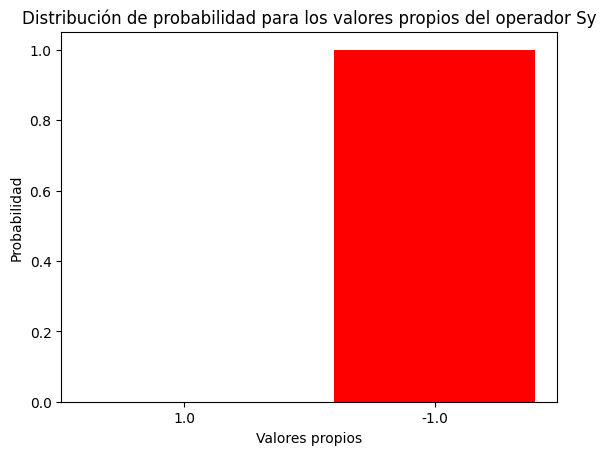

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Vector de estado inicial del sistema cuántico
vector_estado_inicial = np.array([1, 0])

# Matriz del operador de spin en el eje Y (Sy)
operador_spin_y = np.array([[0, 1], [1, 0]])

# Aplicación del operador de spin en Y al estado inicial
vector_estado_final = np.dot(operador_spin_y, vector_estado_inicial)

# Cálculo de la probabilidad para spin up y spin down
probabilidad_spin_up = abs(vector_estado_final[0])**2
probabilidad_spin_down = abs(vector_estado_final[1])**2

# Imprimir los resultados de probabilidad
print("Probabilidad de transición a spin up:", probabilidad_spin_up)
print("Probabilidad de transición a spin down:", probabilidad_spin_down)

# Cálculo de los valores propios del operador Sy
valores_propios, _ = np.linalg.eig(operador_spin_y)

# Gráfico de la distribución de probabilidad para los valores propios
plt.bar(np.arange(len(valores_propios)), abs(vector_estado_final)**2, color='red')  
plt.xticks(np.arange(len(valores_propios)), valores_propios)
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad para los valores propios del operador Sy')
plt.show()


**Desarrolle e incluya en el Github una discusión de los ejercicios:**


**4.4.1**

 Verify that

 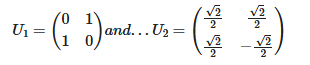

 are unitary matrices. Multiply them and verify that their product is also unitary.

In [44]:
import numpy as np

# Definición de matrices unitarias A y B
matriz_A = np.array([[0, 1], [1, 0]])
matriz_B = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])

# Verificación de unitariedad de la matriz A
es_unitaria_A = "es" if np.allclose(np.dot(matriz_A.conj().T, matriz_A), np.eye(2)) else "no es"

# Verificación de unitariedad de la matriz B
es_unitaria_B = "es" if np.allclose(np.dot(matriz_B.conj().T, matriz_B), np.eye(2)) else "no es"

# Producto de las matrices A y B
producto_AB = np.dot(matriz_A, matriz_B)

# Verificación de unitariedad del producto de A y B
es_unitario_producto = "es" if np.allclose(np.dot(producto_AB.conj().T, producto_AB), np.eye(2)) else "no es"

# Resultados
print("La matriz A", es_unitaria_A, "unitaria")
print("La matriz B", es_unitaria_B, "unitaria")
print("El producto de las matrices A y B", es_unitario_producto, "unitario")


La matriz A es unitaria
La matriz B es unitaria
El producto de las matrices A y B es unitario


**4.4.2**

Regresa al Ejemplo 3.3.2 (bola de billar cuántica), mantén el mismo vector de estado inicial [1, 0, 0, 0]T, pero cambia el mapa unitario a

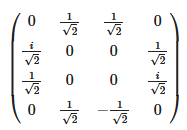

Determina el estado del sistema después de tres pasos de tiempo. ¿Cuál es la probabilidad de que se encuentre la bola cuántica en el punto 3?


In [45]:
import numpy as np

# Definición de la matriz de evolución cuántica
matriz_evolucion = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

# Estado inicial del sistema cuántico
vector_estado_inicial = np.array([1, 0, 0, 0])

# Aplicar la matriz de evolución cuántica 3 veces
vector_estado_final = np.linalg.matrix_power(matriz_evolucion, 3) @ vector_estado_inicial

# Cálculo de la probabilidad de encontrar la partícula en el tercer punto
probabilidad_punto_3 = np.abs(vector_estado_final[2])**2

# Resultados
print("El estado del sistema después de 3 iteraciones es:", vector_estado_final)
print("Probabilidad de encontrar la partícula cuántica en el punto 3:", probabilidad_punto_3)


El estado del sistema después de 3 iteraciones es: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la partícula cuántica en el punto 3: 0.0


**Escribe el vector de estado genérico para el sistema de dos partículas con espín. Generalízalo a un sistema con n partículas (esto es importante: ¡será la realización física para registros cuánticos!).**

Desarrolle e incluya en el Github una discusión de los ejercicios

**4.5.2**

Escribe el vector de estado genérico para el sistema de dos partículas con espín. Generalízalo a un sistema con n partículas (esto es importante: ¡será la realización física para registros cuánticos!).

**SOlUCION:**
El vector de estado genérico para el sistema de dos partículas con espín, denotado como ∣Ψ⟩, es el producto tensorial de los vectores de estado individuales:



Para generalizar este concepto a un sistema con n partículas, podemos extender el producto tensorial para incluir todos los n vectores de estado individuales:

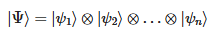



**4.5.3**

Supón el mismo escenario que en el Ejemplo 4.5.2 y deja

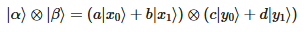

**¿Es este estado separable?**


**SOLUCION**
Teniendo ∣ϕ⟩ en terminos de estado de la base:



Intentamos expresar esto como un producto tensorial de dos estados. Buscaremos estados ∣α⟩ y ∣β⟩ tales que:



Expandiendo el producto tensorial, obtenemos:



Comparando esto con la expresión para ∣ϕ⟩, podemos ver que es imposible encontrar coeficientes a, b, c y d de manera que las dos expresiones sean iguales.
En conclusión el estado ∣ϕ⟩ dado por la Ecuación no es separable. Está entrelazado.